<a href="https://colab.research.google.com/github/ALRIER/OLSWaterloo/blob/main/group_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import datetime
from datetime import datetime


# import statsmodels.api as sm
import statsmodels.formula.api as sm  # COURS MODEL
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use('bmh')

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot


# Loading the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
weather = pd.read_csv('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/GroupAssignment2/weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# columns dropped
"Loud Cover" because there are onoly zeroes
"Apparent Temperature (C)" because Collinearity
"Summary" because simplified
"Daily Summary" too many categories

In [4]:

# drop "Loud Cover" because there are onoly zeroes
# drop "Apparent Temperature (C)" because Collinearity

weather = weather.drop(['Loud Cover', 'Apparent Temperature (C)', 'Daily Summary'], axis=1)
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [5]:
# Rename columns, put an underscore between words

weather = weather.rename(columns={
    'Simplified Summary': 'Summary',
    'Precip Type': 'Precip_Type',
    'Temperature (C)': 'Temperature',
    'Wind Speed (km/h)': 'Wind_Speed',
    'Wind Bearing (degrees)': 'Wind_Bearing',
    'Visibility (km)': 'Visibility',
    'Pressure (millibars)': 'Pressure'
    })

# date-time format

In [6]:
# date-time format

date_list = []

for i in range(weather.shape[0]):
    a = weather['Formatted Date'][i]
    l = (int(a[:4]), int(a[5:7]), int(a[8:10]), int(a[11:13]), int(a[14:16]), int(a[17:19]))
    b = datetime(l[0], l[1], l[2], l[3], l[4], l[5])
    date_list.append(b)


In [7]:
weather.insert(0, 'Date_time', date_list)
weather.drop('Formatted Date', inplace=True, axis=1)

In [8]:
weather.tail()

,Date_time,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95
96452,2016-09-09 23:00:00,Partly Cloudy,rain,20.438889,0.61,5.8765,39.0,15.5204,1016.16


# exploring 'Precip Type' and 'Summary', categorical variables

In [9]:
weather['Precip_Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [10]:
weather['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

# 'Precip Type', nulls = 517 - Imputation to do!!!

In [15]:
weather['Precip_Type'].isnull().sum()

0

In [12]:
media = weather['Precip_Type'].mode()[0]
weather['Precip_Type'].fillna(media, inplace=True)

In [13]:
weather['Precip_Type'].isnull().sum()

0

In [14]:
weather['Precip_Type'].unique()

array(['rain', 'snow'], dtype=object)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_time     96453 non-null  datetime64[ns]
 1   Summary       96453 non-null  object        
 2   Precip_Type   95936 non-null  object        
 3   Temperature   96453 non-null  float64       
 4   Humidity      96453 non-null  float64       
 5   Wind_Speed    96453 non-null  float64       
 6   Wind_Bearing  96453 non-null  float64       
 7   Visibility    96453 non-null  float64       
 8   Pressure      96453 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 6.6+ MB


# drop NaN

In [16]:
weather = weather.dropna().copy()
weather.head()

,Date_time,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


# descriptive stats

In [17]:
weather.describe()


,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000


# ploting df
evident outliers in "Pressure (millibars)" - zeros to remove (Imputation?)

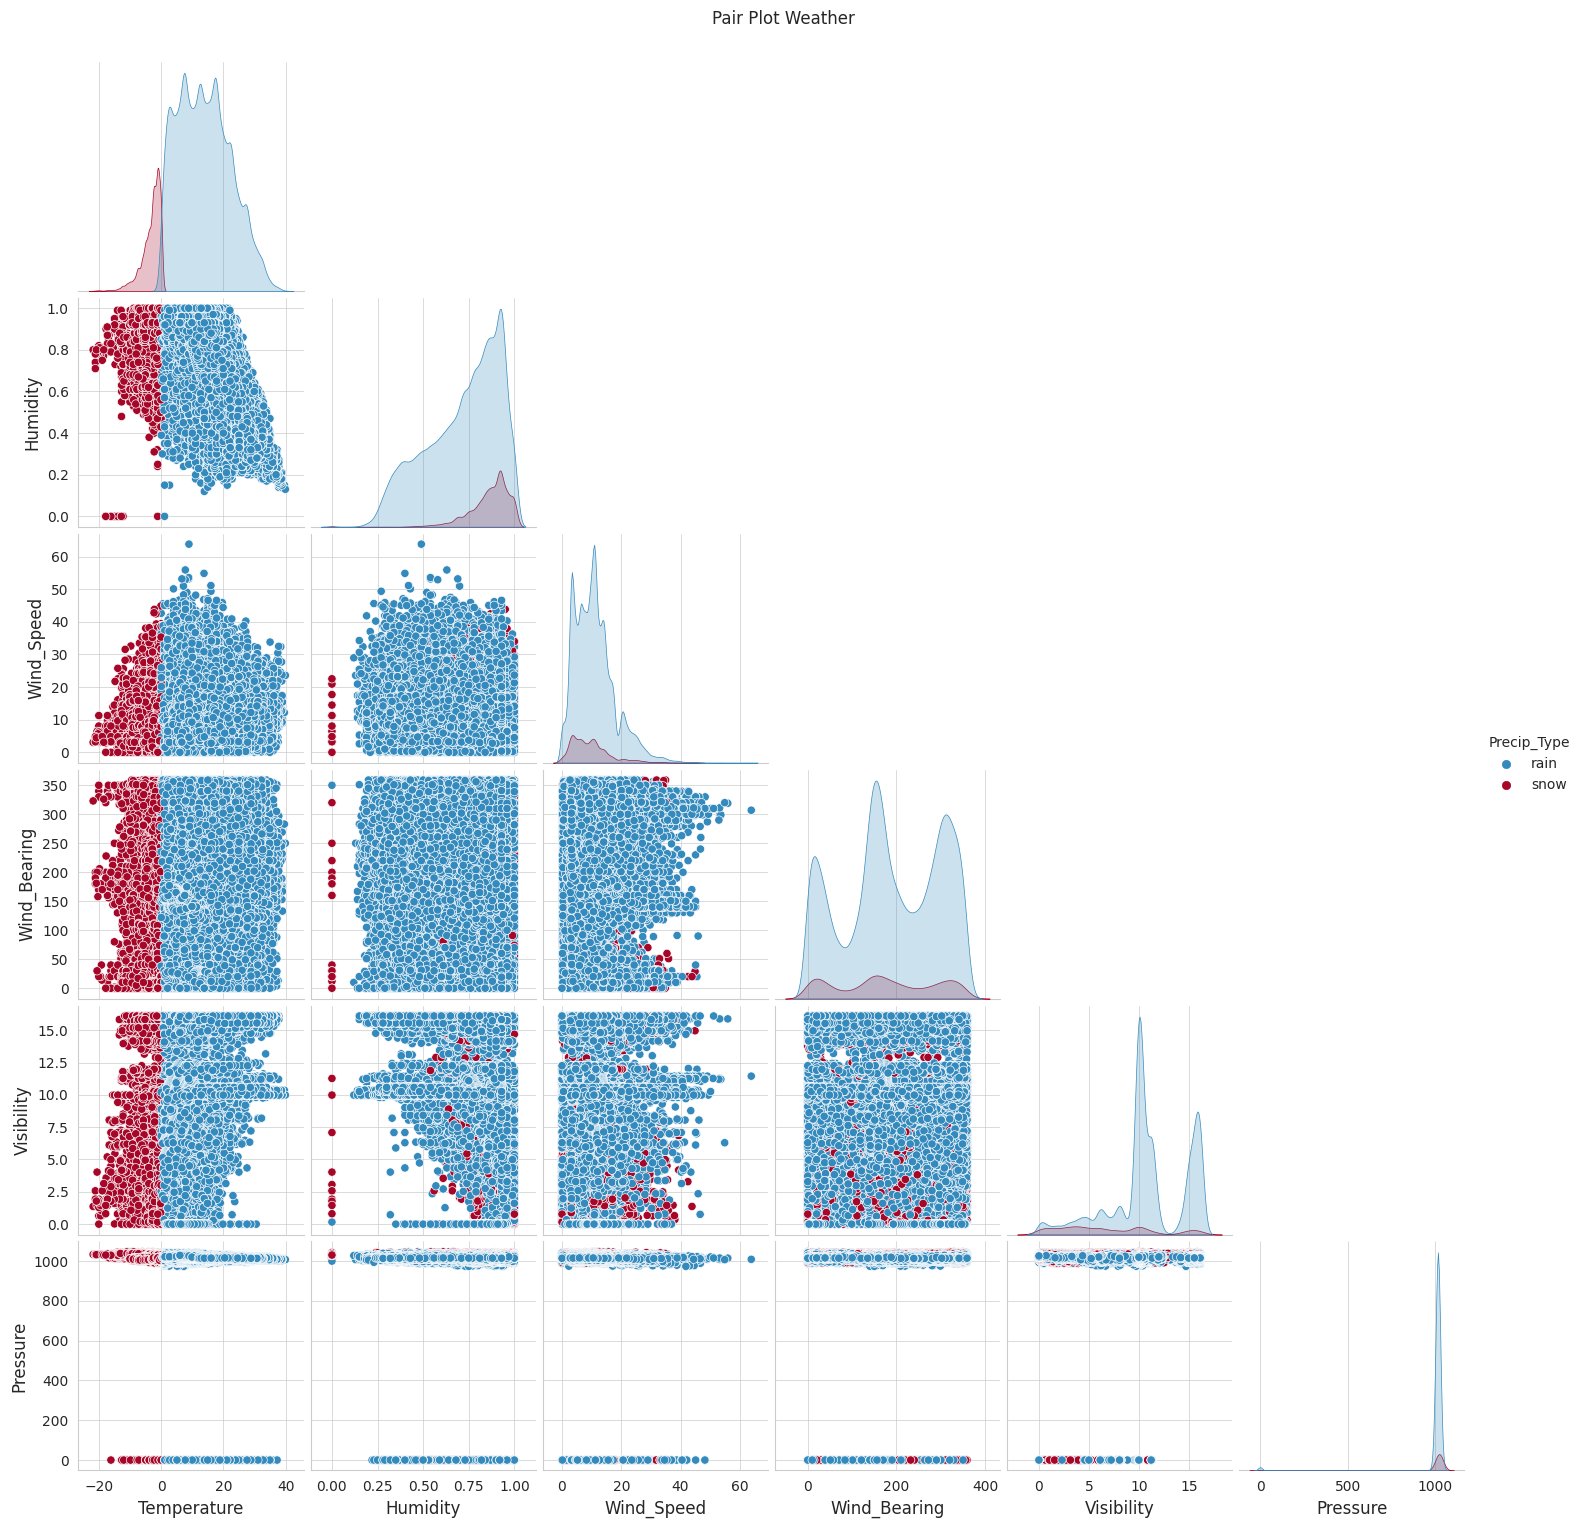

In [18]:
weather_pair_plot = sns.pairplot(weather, hue = 'Precip_Type' , corner=True)
weather_pair_plot.fig.suptitle('Pair Plot Weather', y=1.02);

# correlation matrix

The dependent variable is Temperature (what we want to predict)

<ipython-input-19-1d2a070d94cd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(weather.corr()), 0)
<ipython-input-19-1d2a070d94cd>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(), annot=True, ax=ax, cmap="YlGnBu", mask=mask);


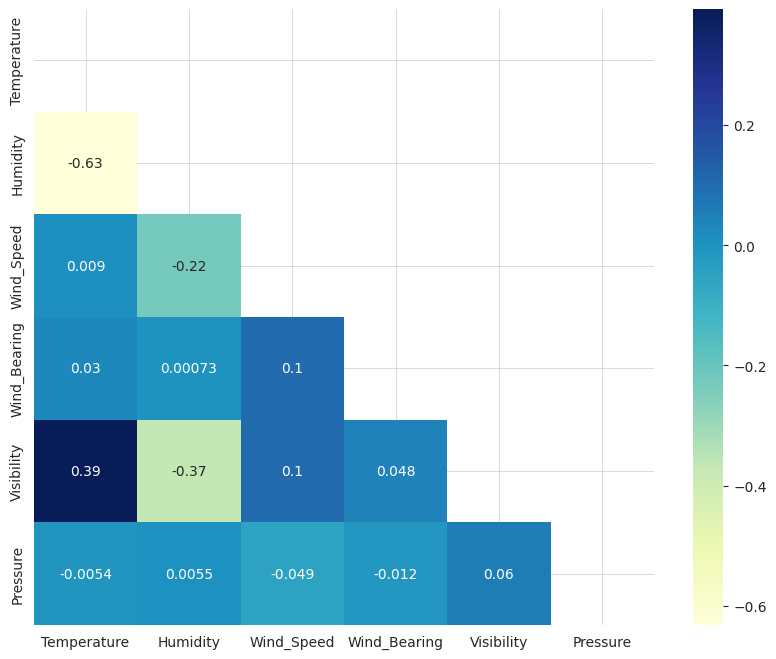

In [19]:
fig, ax = plt.subplots(figsize=(10,8)) 

# creating mask
mask = np.triu(np.ones_like(weather.corr()), 0)

sns.heatmap(weather.corr(), annot=True, ax=ax, cmap="YlGnBu", mask=mask);

Important correlation between Temperature and Humidity
Low correlation with other variables

# exploring "Pressure (millibars)"

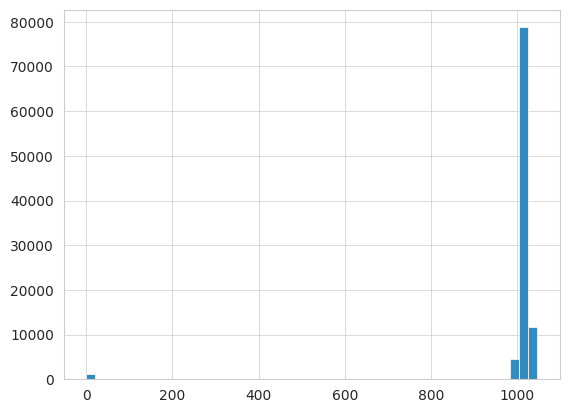

In [20]:
# Pressure (millibars) with zeros - outliers

plt.hist(weather["Pressure"], bins=50);

# dropping zeros

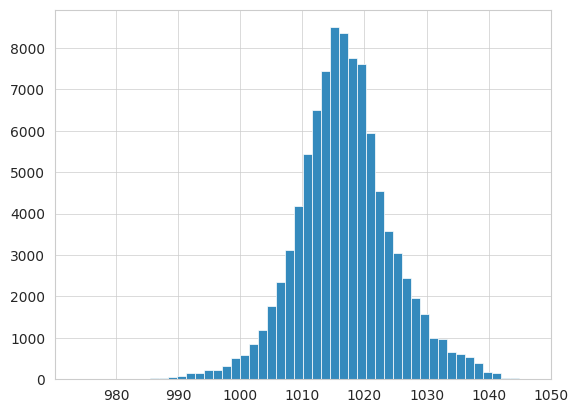

In [21]:
# Pressure (millibars) removing zeroes

plt.hist(weather["Pressure"].loc[lambda x : x != 0], bins=50);

most consistent distribution after removing zeros. Normal shape 

In [22]:
# number of zeros in Pressure (millibars)
weather["Pressure"].loc[lambda x : x == 0].shape[0]

1288

In [23]:
#Zeros imputation by the mean of the variable 
pressure_mean = weather["Pressure"].mean()
weather["Pressure"] = np.where(weather["Pressure"] == 0, pressure_mean, weather["Pressure"])

In [24]:
weather["Pressure"].loc[lambda x : x == 0].shape[0]

0

Total of records remved because zero in "Pressure" column

In [25]:
# Drop records with zero in "resure" column
weather = weather.loc[weather["Pressure"] != 0].copy()
weather

,Date_time,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


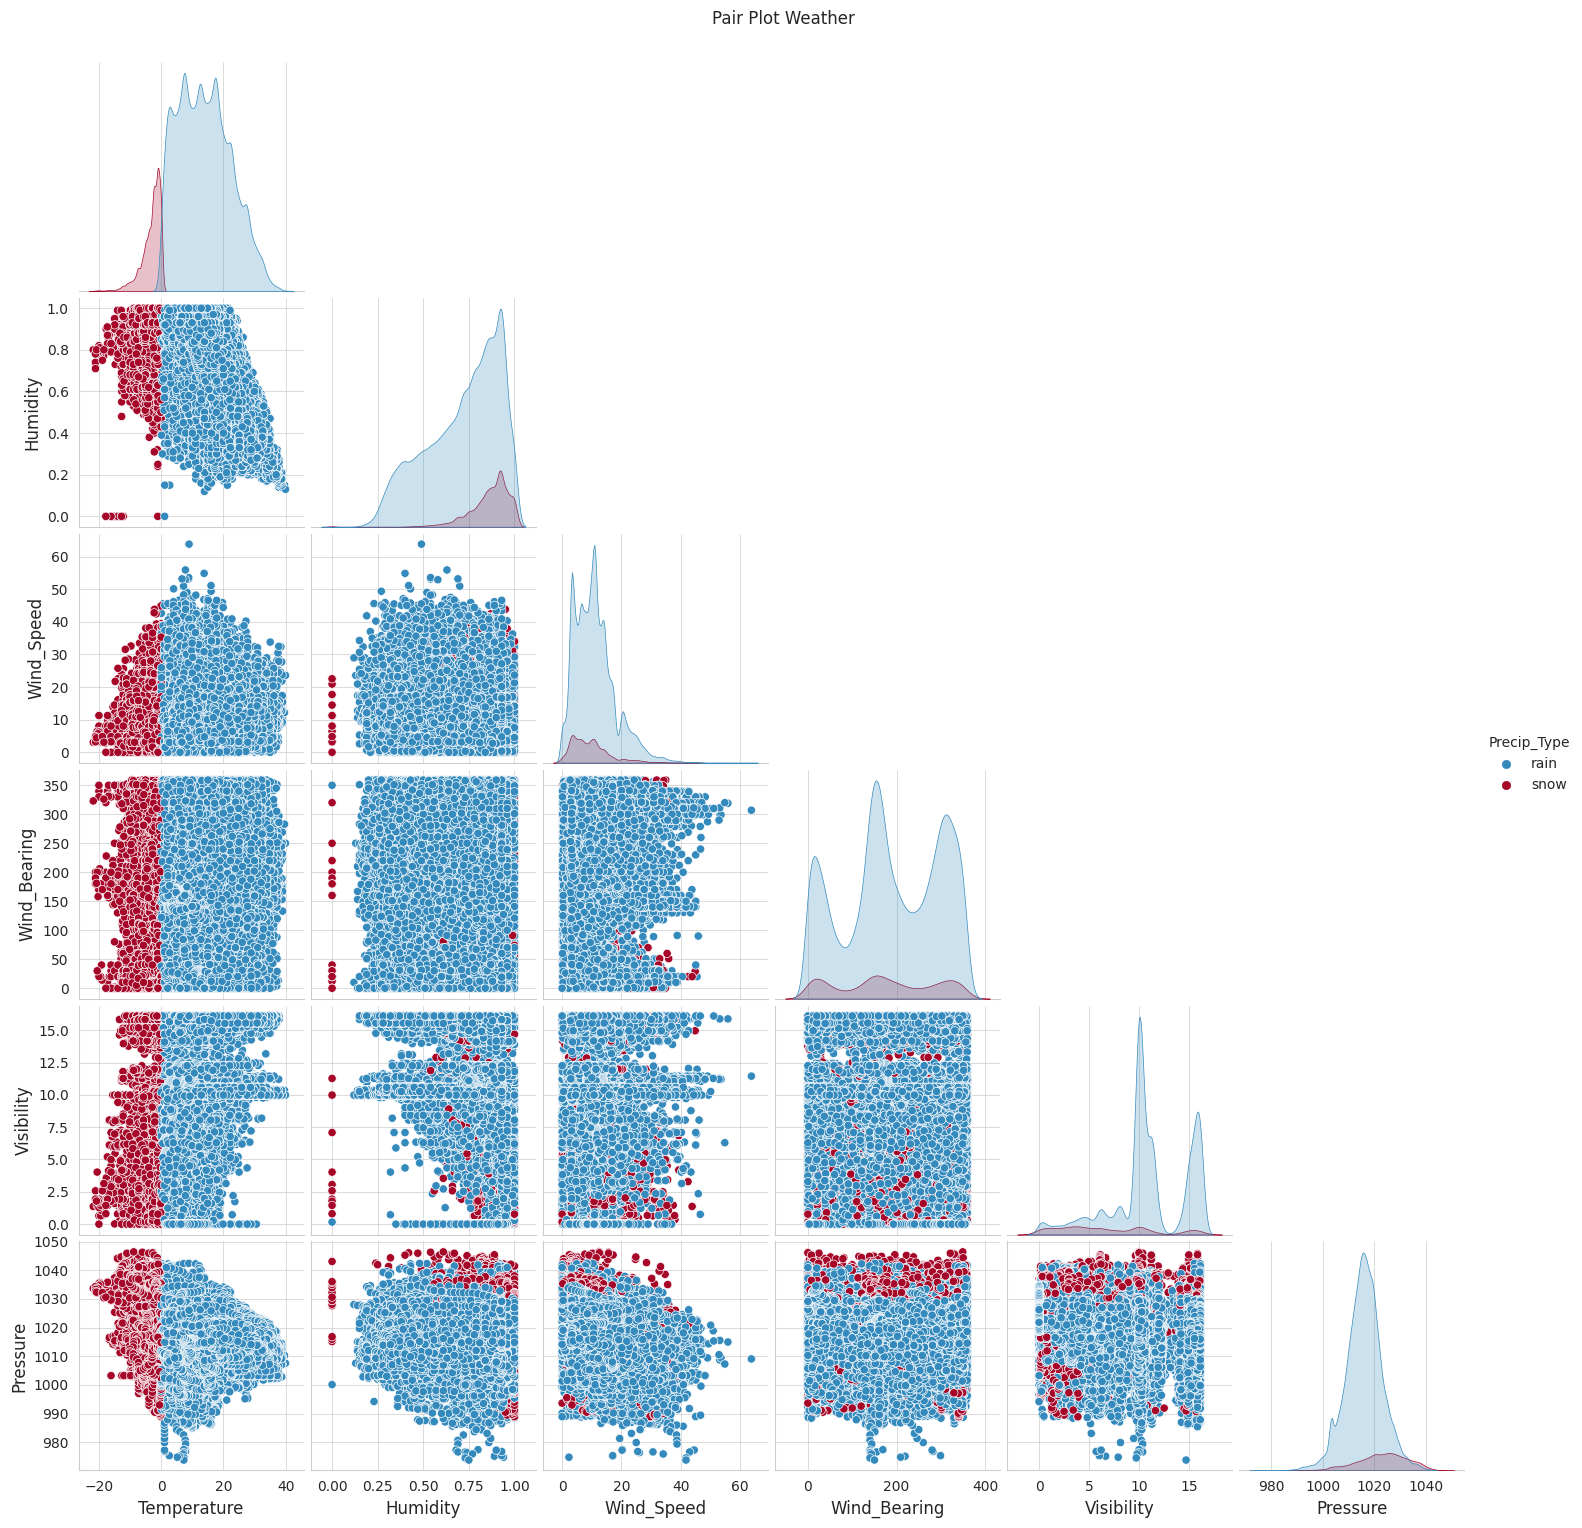

In [26]:
# Plotting df again

weather_pair_plot = sns.pairplot(weather, hue = 'Precip_Type' , corner=True)
weather_pair_plot.fig.suptitle('Pair Plot Weather', y=1.02);

this graph reconfirm the strong correlation between Temperature and Humidity and the low correlation with the other variables

<ipython-input-27-813c77980ce1>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(weather.corr()), 0)
<ipython-input-27-813c77980ce1>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(), annot=True, ax=ax, cmap="YlGnBu", mask=mask);


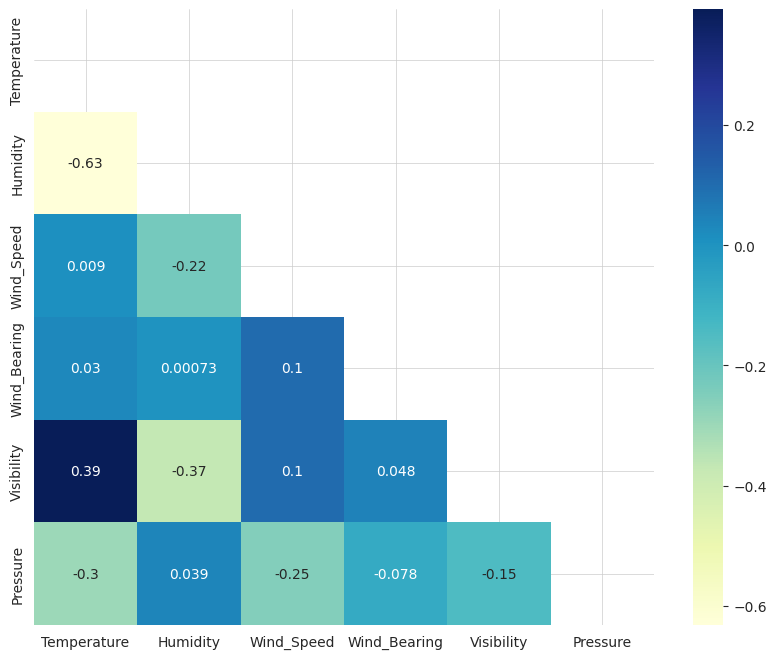

In [27]:
# Calculating correlations again

fig, ax = plt.subplots(figsize=(10,8)) 

# creating mask
mask = np.triu(np.ones_like(weather.corr()), 0)

sns.heatmap(weather.corr(), annot=True, ax=ax, cmap="YlGnBu", mask=mask);

In [28]:
weather.head()

,Date_time,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_time     96453 non-null  datetime64[ns]
 1   Summary       96453 non-null  object        
 2   Precip_Type   96453 non-null  object        
 3   Temperature   96453 non-null  float64       
 4   Humidity      96453 non-null  float64       
 5   Wind_Speed    96453 non-null  float64       
 6   Wind_Bearing  96453 non-null  float64       
 7   Visibility    96453 non-null  float64       
 8   Pressure      96453 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 7.4+ MB


In [30]:
# Replacing espaces between words by undersores in Summary categories, so they can be used in the OLS tool

org_values = list(weather['Summary'].unique())

dash_values = [x.replace(' ', '_') for x in org_values]

weather['Summary'] = weather['Summary'].replace(org_values, dash_values)

In [31]:
# categorical variables to dummies variables  

weather = pd.get_dummies(weather, columns=['Summary', 'Precip_Type'], drop_first=True)

In [32]:
weather.head()

,Date_time,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Summary_Breezy_and_Dry,Summary_Breezy_and_Foggy,Summary_Breezy_and_Mostly_Cloudy,...,Summary_Overcast,Summary_Partly_Cloudy,Summary_Rain,Summary_Windy,Summary_Windy_and_Dry,Summary_Windy_and_Foggy,Summary_Windy_and_Mostly_Cloudy,Summary_Windy_and_Overcast,Summary_Windy_and_Partly_Cloudy,Precip_Type_snow
0,2006-04-01 00:00:00,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2006-04-01 01:00:00,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006-04-01 02:00:00,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2006-04-01 04:00:00,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96453 entries, 0 to 96452
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Date_time                                    96453 non-null  datetime64[ns]
 1   Temperature                                  96453 non-null  float64       
 2   Humidity                                     96453 non-null  float64       
 3   Wind_Speed                                   96453 non-null  float64       
 4   Wind_Bearing                                 96453 non-null  float64       
 5   Visibility                                   96453 non-null  float64       
 6   Pressure                                     96453 non-null  float64       
 7   Summary_Breezy_and_Dry                       96453 non-null  uint8         
 8   Summary_Breezy_and_Foggy                     96453 non-null  uint8         


In [ ]:
# Use 70% of the dataset as training, the remaining 30% will be used for testing

In [ ]:
# Use 70% of the dataset as training for the OLS, the remaining 30% will be used for testing

a = int(round(weather.shape[0]*.7,0))
train = weather.iloc[:a]
test = weather.iloc[a:]

In [ ]:
train.shape

(66254, 34)

In [ ]:
test.shape

(28394, 34)

In [ ]:
# OLS model - Original data

# Initialize the regression model
m = sm.ols('Temperature ~ \
    Humidity + \
    Wind_Speed + \
    Wind_Bearing + \
    Visibility + \
    Pressure + \
    Summary_Clear + \
    Summary_Dangerously_Windy + \
    Summary_Drizzle + \
    Summary_Dry + \
    Summary_Foggy + \
    Summary_Humid + \
    Summary_Light_Rain + \
    Summary_Mostly_Cloudy + \
    Summary_Overcast + \
    Summary_Partly_Cloudy + \
    Summary_Rain + \
    Summary_Windy + \
    Precip_Type_snow', \
    data = train)

# Fit the regression model
m = m.fit()

PatsyError: ignored

In [ ]:
test.shape

(28394, 34)

In [ ]:
print(m.summary())

NameError: ignored

* curtosis = 3.07, near to 3, normality
* skew = -0.328
* Adj. R-squared = 0.674, 67.4% of variation explained the model
* 7 variables with p-code > 0.05

* forward - remove variables with p-code > 0.05, one by one, validate model

In [ ]:
import statsmodels.api as sm

alpha = 0.05
predictors = train.columns.drop(['Temperature', 'Date_time']) # matrix of predictors
# Inicializar modelo
m = sm.OLS(train['Temperature'], sm.add_constant(train[predictors])) # vector temperature + matrix predictors
results = m.fit()

#backward while loop
while len(predictors) > 0:
    pvaluemax = max(results.pvalues)
    if pvaluemax > alpha:
        variable = results.pvalues.idxmax()
        predictors = predictors.drop(variable)
        m = sm.OLS(train['Temperature'], sm.add_constant(train[predictors]))
        results = m.fit()
    else:
        break

# Imprimir resultados finales
print(results.summary())

In [ ]:
test.shape


const                   317.67, if the explanatory variables would be zero, the temperature would be 319,78 °C. this can be interpreted as the  regulatory fonction of the other variables in the weather

Humidity                -26.53, the increase in one unit of humidity (unit of measure?) will reduce the Temperature by 26.29 °C

Wind_Speed               -0.26, the increase in one unit of Wind Spead in kilometer / hour will reduce the Temperature by 0.26 °C

Wind_Bearing              0.0015, the increase in one unit of Wind Bearing in degrees will increase the Temperature by 0.0013 °C

Visibility                0.051, the increase in one unit of Visibility in kilometers will increase the Temperature by 0.098 °C

Pressure                 -0.28, the increase in one unit of Preasure in millibars will reduce the Temperature by 0.28 °C

Summary_Clear             0.79

Summary_Dry               1.97

Summary_Foggy            -0.2797

Summary_Humid            10.85

Summary_Overcast         -1.42

Summary_Partly_Cloudy     1.38

Summary_Rain                   0

Precip_Type_snow        -10.81

# Testing the model

In [ ]:
# Array containing the significant variables

keep = results.bse.index[1:]
keep

In [ ]:
# Array containiong all the variables - columns

columns = weather.columns[2:]
columns

In [ ]:
# The variables that need to drop from the test df

remove = list([i for i in columns if i not in keep])
remove

In [ ]:
# Removing non-significant variables from the test

test = test.drop(remove, axis=1)

In [ ]:
# Array containing the test values 

array_ols = np.array(test.iloc[:,2:])
array_ols

In [ ]:
# Arry of ones that will be appended to 'array_ols' for testing (this will multiply the constant value)

temp_array = np.ones((28923, 1))
temp_array

In [ ]:
# Testing array

values = np.concatenate([temp_array, array_ols], axis=1)
values

In [ ]:
test_results = results.predict(values).round(2)
test_results

In [ ]:
# df Actual temperature vs predicted temperature

df_result = pd.DataFrame({'Temperature_actual': round(test['Temperature'], 2), 'Prediction':test_results})

In [ ]:
df_result

In [ ]:
# Plotting a segment of the test

df_result[-1000: - 750].plot()